In [2]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.

ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Inspect City Data DataFrame

In [6]:
# Get the columns and the rows that are not null.

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are null

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column.

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.

sum(city_data_df["type"]=="Urban")

66

In [11]:
# Get the number of data points from the Suburban cities.

sum(city_data_df["type"]=="Suburban")

36

In [12]:
# Get the number of data points from the Rural cities.

sum(city_data_df["type"]=="Rural")

18

### Inspect Ride Data DataFrame

In [13]:
# Get the columns and the rows that are not null

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge DataFrames

In [16]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Creating a Bubble Chart for the Ride-Sharing Data

In [17]:
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create the Suburban and Rural city DataFrames.

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [19]:
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
# Get the number of rides for urban cities.

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
# Get the number of rides for suburban cities.

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
# Get the number of rides for rural cities.

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [24]:
# Get average fare for each city in the urban cities.

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
# Get average fare for each city in the suburban cities.

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
# Get average fare for each city in the rural cities.

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [27]:
# Get the average number of drivers for each urban city.

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [28]:
# Get the average number of drivers for each suburban city.

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [29]:
# Get the average number of drivers for each rural city.

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

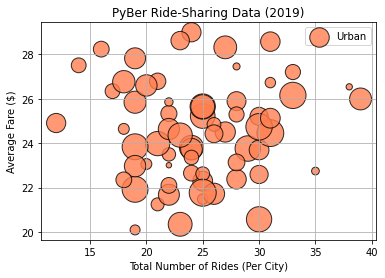

In [30]:
# Build the scatter plots for urban cities.

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c='coral',
           edgecolor='k', linewidths=1,
           alpha=0.8, label="Urban")


# Add chart title and axes' labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")


# Add grid
plt.grid(True)

# Add the legend.
plt.legend()

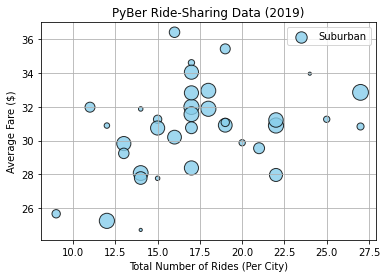

In [31]:
# Build the scatter plots for suburban cities.

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue',
           edgecolor='k', linewidths=1,
           alpha=0.8, label="Suburban")


# Add chart title and axes' labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")


# Add grid
plt.grid(True)

# Add the legend.
plt.legend()

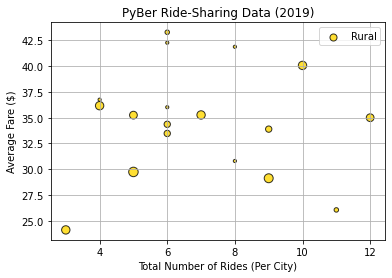

In [32]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c='gold',
           edgecolor='k', linewidths=1,
           alpha=0.8, label="Rural")


# Add chart title and axes' labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")


# Add grid
plt.grid(True)

# Add the legend.
plt.legend()

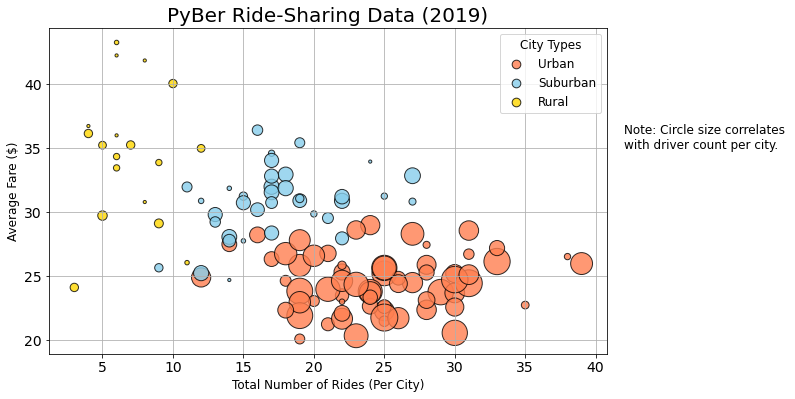

In [159]:
# Add the scatter charts for each type of city.

plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c='coral',
           edgecolor='k', linewidths=1,
           alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue',
           edgecolor='k', linewidths=1,
           alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c='gold',
           edgecolor='k', linewidths=1,
           alpha=0.8, label="Rural")

# Add chart title and axes' labels
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)


# Add grid
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates \nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png", bbox_inches="tight")

# Show the plot
plt.show()

### Summary Statistics

In [40]:
# Get summary statistics for Urban cities.

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [39]:
# Get summary statistics for Suburban cities.

suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [36]:
# Get summary statistics for Rural cities.

rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [41]:
# Get summary statistics on Urban ride count.

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [42]:
# Get summary statistics on Suburban ride count.

suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [43]:
# Get summary statistics on Rural ride count.

rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [48]:
## mean, median, and mode using Pandas

# Calculate the mean of the ride count for each city type.

(round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), 
 round(rural_ride_count.mean(),2))

(24.62, 17.36, 6.94)

In [49]:
# Calculate the median of the ride count for each city type.

urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [52]:
# Calculate the mode of the ride count for each city type.

urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [53]:
## mean and median using NumPy and mode using SciPy

# Import NumPy and the stats module from SciPy

import numpy as np
import scipy.stats as sts

In [59]:
# Calculate the measures of central tendency for the ride count for the urban cities.

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [60]:
# Calculate the measures of central tendency for the ride count for the suburban cities.

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [62]:
# Calculate the measures of central tendency for the ride count for the rural cities.

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [63]:
## Summary Satistics for Fare by City Type

# Get the fares for the urban cities

urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [67]:
# Calculate the measures of central tendency for the average fare for the urban cities.

mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)

print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
print(f"The median fare price for urban trips is ${median_urban_fares}.")
print(f"The mode fare price (in $) for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price (in $) for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [70]:
# Get the fares for the suburban cities

suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [71]:
# Calculate the measures of central tendency for the average fare for the suburban cities.

mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
print(f"The median fare price for suburban trips is ${median_suburban_fares}.")
print(f"The mode fare price (in $) for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price (in $) for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [72]:
# Get the fares for the rural cities

rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [73]:
# Calculate the measures of central tendency for the average fare for the rural cities.

mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
print(f"The median fare price for rural trips is ${median_rural_fares}.")
print(f"The mode fare price (in $) for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price (in $) for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [75]:
## Summary Satistics for Number fo Drivers by City Type

# Get the driver count data from the urban cities.

urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [85]:
# Calculate the mean median and mode for the urban suburban, and rural driver count Series using NumPy and SciPy

# urban driver count measures of central tendency

mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

print(f"The mean driver count for urban cities is {mean_urban_drivers:.0f}.")
print(f"The median driver count for urban cities is {median_urban_drivers}.")
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.0.
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [79]:
# Get the driver count data from the suburban cities.

suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [84]:
# suburban driver count measures of central tendency

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.0f}.")
print(f"The median driver count for suburban cities is {median_suburban_drivers}.")
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.0.
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [81]:
# Get the driver count data from the rural cities.

rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [83]:
# rural driver count measures of central tendency

mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

print(f"The mean driver count for rural cities is {mean_rural_drivers:.0f}.")
print(f"The median driver count for rural cities is {median_rural_drivers}.")
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for rural cities is 4.
The median driver count for rural cities is 4.0.
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


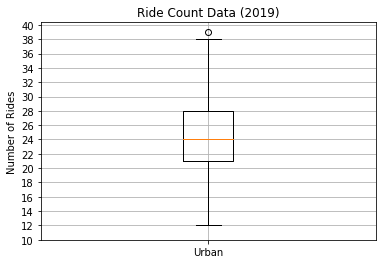

Summary Statistics


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [140]:
# Create a box-and-whisker plot for the urban cities ride count.

x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_ride_count.describe()

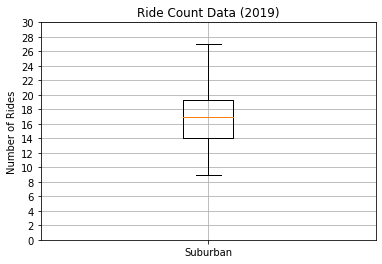

Summary Statistics


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [141]:
# Create a box-and-whisker plot for the suburban cities ride count.

x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 31, step=2.0))
ax.grid()
plt.show()


print("Summary Statistics")
suburban_ride_count.describe()

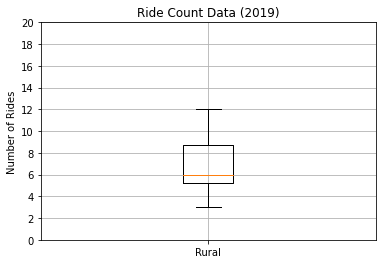

Summary Statistics


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [142]:
# Create a box-and-whisker plot for the rural cities ride count.

x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 21, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_ride_count.describe()

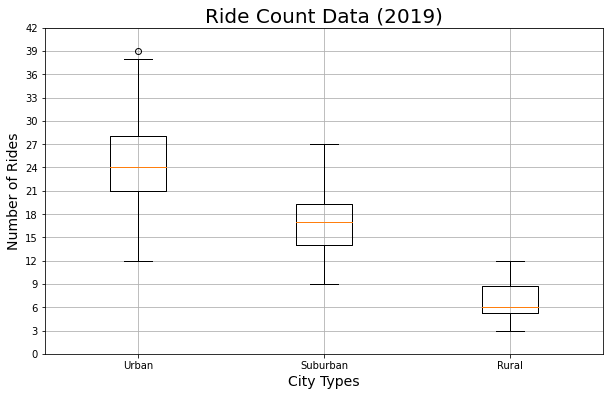

In [93]:
# Add all ride count box-and-whisker plots to the same graph

x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")

plt.show()

In [143]:
print("Urban Ride Count Summary Statistics")
print(f"{urban_ride_count.describe()}\n")
print("Suburban Ride Count Summary Statistics")
print(f"{suburban_ride_count.describe()}\n")
print("Rural Ride Count Summary Statistics")
print(f"{rural_ride_count.describe()}\n")

Urban Ride Count Summary Statistics
count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

Suburban Ride Count Summary Statistics
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

Rural Ride Count Summary Statistics
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64



In [102]:
# Get the city that matches 39 (outlier in urban ride count series)

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


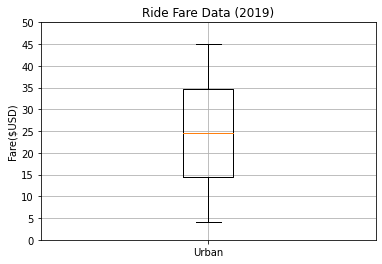

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [105]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

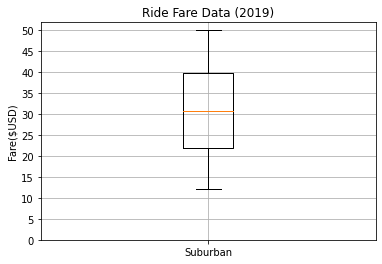

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [107]:
# Create a box-and-whisker plot for the suburban fare data.

x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

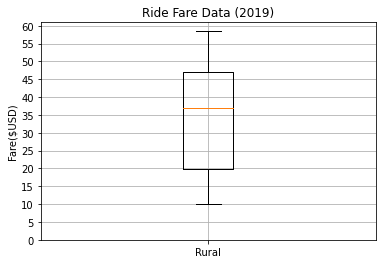

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [109]:
# Create a box-and-whisker plot for the rural fare data.

x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

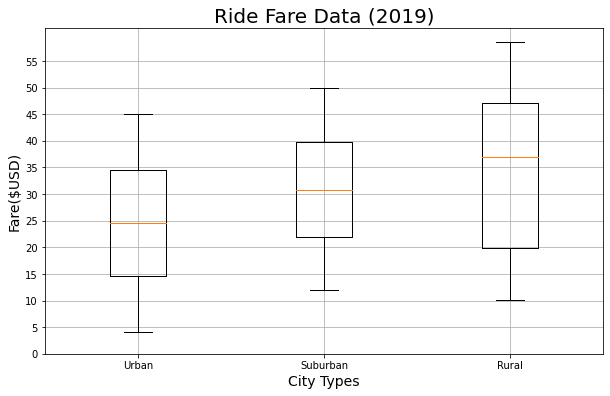

In [134]:
# Add all fare data box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")

plt.show()

In [144]:
print("Urban Fare Summary Statistics")
print(f"{urban_fares.describe()}\n")
print("Suburban Fare Summary Statistics")
print(f"{suburban_fares.describe()}\n")
print("Rural Fare Summary Statistics")
print(f"{rural_fares.describe()}\n")

Urban Fare Summary Statistics
count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

Suburban Fare Summary Statistics
count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

Rural Fare Summary Statistics
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64



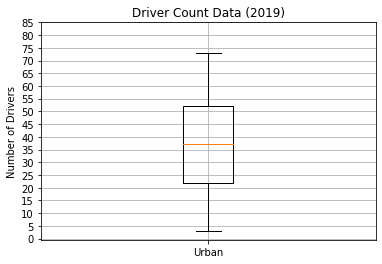

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [129]:
# Create the box-and-whisker plot for the urban driver count data.

x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

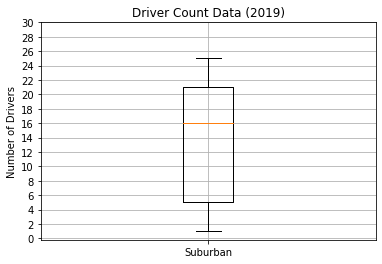

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [131]:
# Create the box-and-whisker plot for the suburban driver count data.

x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 31, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

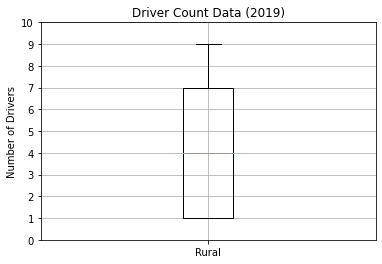

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [133]:
# Create the box-and-whisker plot for the rural driver count data.

x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 11, step=1.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

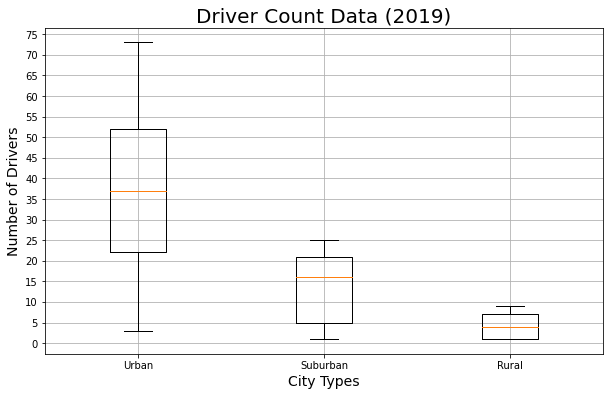

In [137]:
# Add all driver box-and-whisker plots to the same graph

x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)

ax.boxplot(driver_data, labels=x_labels)

ax.set_yticks(np.arange(0, 80, step=5.0))

ax.grid()

# Save the figure
plt.savefig("analysis/Fig4.png")

plt.show()

In [145]:
print("Urban Drivers Summary Statistics")
print(f"{urban_drivers.describe()}\n")
print("Suburban Drivers Summary Statistics")
print(f"{suburban_drivers.describe()}\n")
print("Rural Drivers Summary Statistics")
print(f"{rural_drivers.describe()}\n")

Urban Drivers Summary Statistics
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

Suburban Drivers Summary Statistics
count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

Rural Drivers Summary Statistics
count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64



### Percentage of Total Fares by City Type (Pie Charts)

In [147]:
# Get the sum of the fares for each city type.

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [149]:
# Get the sum of all the fares.

total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [150]:
# Calculate the percentage of fare for each city type.

type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

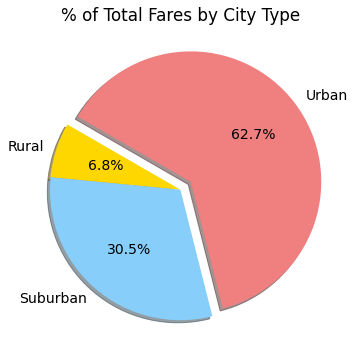

In [157]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure

plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()